<a href="https://colab.research.google.com/github/eduardopadilla3/Unit2_BW_code/blob/master/Unit2project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime, timedelta, date, time
from time import strftime
import os

curr_path = os.getcwd()
csv_name = 'str_hilo_35.csv'
output_file = '%s\\data\\%s' % (curr_path,csv_name)
error_file = '%s\\error.txt' % (curr_path)

if os.path.exists(error_file):
    os.remove(error_file)

# Match date
current_match_date = datetime.now()
current_time = datetime.now().time()
if current_time >= time(0,0) and current_time <= time(11, 30):
    previous_day = current_match_date - timedelta(days=1)
    current_match_date = previous_day
db_match_date = current_match_date.strftime("%Y%m%d")
current_match_date = current_match_date.strftime("%Y-%m-%d 11:30:00")

ou_hdc = 'OU35'

print('Execution time: %s' % strftime('%Y-%m-%d %H:%M:%S'))
print('Current match date: %s' % current_match_date)

Execution time: 2020-10-10 01:56:35
Current match date: 2020-10-09 11:30:00


In [2]:
import cx_Oracle
import codecs

db_user = 'JW'
db_password = '901203'
db_dsn = 'HOME-PC/XE'
db_encoding = 'UTF-8'

# Database connection
connection = None
try:
    connection = cx_Oracle.connect(
        db_user,
        db_password,
        db_dsn,
        encoding=db_encoding)

    c = connection.cursor()
    
    if os.path.exists(output_file):
        os.remove(output_file)
    
    file = codecs.open(output_file, "a+", "utf-8")

    # write file header
    file.write('MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,TOTAL_GOAL_COUNT,ML_TYPE,STR_OU_MODE_HDC,STR_OU_AVG_HI,STR_OU_AVG_LO,STR_OU_BET365_HDC,STR_OU_BET365_HI,STR_OU_BET365_LO,STR_OU_YINGWO_HDC,STR_OU_YINGWO_HI,STR_OU_YINGWO_LO,STR_OU_PINNACLE_HDC,STR_OU_PINNACLE_HI,STR_OU_PINNACLE_LO,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,STR_O_BET365_HI_DIFF,STR_O_BET365_LO_DIFF,STR_O_YINGWO_HI_DIFF,STR_O_YINGWO_LO_DIFF,STR_O_PINNACLE_HI_DIFF,STR_O_PINNACLE_LO_DIFF,STR_O_MACAU_HI_DIFF,STR_O_MACAU_LO_DIFF,STR_O_HKJC_HI_DIFF,STR_O_HKJC_LO_DIFF,STR_A_MODE_HDC,STR_A_AVG_H,STR_A_AVG_A,STR_A_BET365_HDC,STR_A_BET365_H,STR_A_BET365_A,STR_A_YINGWO_HDC,STR_A_YINGWO_H,STR_A_YINGWO_A,STR_A_PINNACLE_HDC,STR_A_PINNACLE_H,STR_A_PINNACLE_A,STR_A_MACAU_HDC,STR_A_MACAU_H,STR_A_MACAU_A,STR_HDA_BET365_H,STR_HDA_BET365_D,STR_HDA_BET365_A,STR_HDA_YINGWO_H,STR_HDA_YINGWO_D,STR_HDA_YINGWO_A,STR_HDA_PINNACLE_H,STR_HDA_PINNACLE_D,STR_HDA_PINNACLE_A,STR_HDA_MACAU_H,STR_HDA_MACAU_D,STR_HDA_MACAU_A,STR_HDA_HKJC_H,STR_HDA_HKJC_D,STR_HDA_HKJC_A,HOME_TOTAL_GF,HOME_TOTAL_GA,HOME_AVG_GF,HOME_HOME_GF,HOME_HOME_GA,HOME_HOME_AVG_GF,AWAY_TOTAL_GF,AWAY_TOTAL_GA,AWAY_AVG_GF,AWAY_AWAY_GF,AWAY_AWAY_GA,AWAY_AWAY_AVG_GF,HOME_ADV,AWAY_ADV,GAME_POINT,HOME_WIN_RATE,HOME_DRAW_RATE,HOME_LOSE_RATE,HOME_HOME_WIN_RATE,HOME_HOME_LOSE_RATE,HOME_HOME_DRAW_RATE,AWAY_WIN_RATE,AWAY_DRAW_RATE,AWAY_LOSE_RATE,AWAY_AWAY_WIN_RATE,AWAY_AWAY_LOSE_RATE,AWAY_AWAY_DRAW_RATE\n')
    sql = """
        SELECT 
            -- INFO
            info.MATCH_ID, info.MATCH_DATETIME, info.LEAGUE, info.HOME_TEAM, info.AWAY_TEAM, info.HOME_FT_GOAL, info.AWAY_FT_GOAL, info.HOME_FT_GOAL+info.AWAY_FT_GOAL AS TOTAL_GOAL_COUNT,
            CASE 
                WHEN info.MATCH_DATETIME < TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'TRAIN'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') AND info.MATCH_DATETIME < TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'VALID'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') AND info.MATCH_DATETIME < TO_TIMESTAMP('%s', 'YYYY-MM-DD HH24:MI:SS') THEN 'TEST'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('%s', 'YYYY-MM-DD HH24:MI:SS') THEN 'PREDICT'
            END AS ML_TYPE, 
            -- HILO
            hilo.STR_MODE_HDC AS STR_OU_MODE_HDC, ROUND(hilo.STR_O_AVG_HI,4) AS STR_OU_AVG_HI, ROUND(hilo.STR_O_AVG_LO,4) AS STR_OU_AVG_LO, 
            hilo.STR_BET365_HDC AS STR_OU_BET365_HDC, hilo.STR_O_BET365_HI AS STR_OU_BET365_HI, hilo.STR_O_BET365_LO AS STR_OU_BET365_LO, 
            hilo.STR_YINGYO_HDC AS STR_OU_YINGWO_HDC, hilo.STR_O_YINGYO_HI AS STR_OU_YINGWO_HI, hilo.STR_O_YINGYO_LO AS STR_OU_YINGWO_LO, 
            hilo.STR_PINGBOK_HDC AS STR_OU_PINNACLE_HDC, hilo.STR_O_PINGBOK_HI AS STR_OU_PINNACLE_HI, hilo.STR_O_PINGBOK_LO AS STR_OU_PINNACLE_LO, 
            hilo.STR_MACAU_HDC AS STR_OU_MACAU_HDC, hilo.STR_O_MACAU_HI AS STR_OU_MACAU_HI, hilo.STR_O_MACAU_LO AS STR_OU_MACAU_LO, 
            hilo.STR_HKJC_HDC AS STR_OU_HKJC_HDC, hilo.STR_O_HKJC_HI AS STR_OU_HKJC_HI, hilo.STR_O_HKJC_LO AS STR_OU_HKJC_LO, 
        --    CASE WHEN hilo.STR_MACAU_HDC=hilo.STR_MODE_HDC AND hilo.STR_O_MACAU_HI<hilo.STR_O_AVG_LO AND hilo.STR_O_MACAU_LO<hilo.STR_O_AVG_HI THEN 1 ELSE 0 END AS STR_OU_MACAU_WRONG_HDC, 
        --    CASE WHEN hilo.STR_HKJC_HDC=hilo.STR_MODE_HDC AND hilo.STR_O_HKJC_HI<hilo.STR_O_AVG_LO AND hilo.STR_O_HKJC_LO<hilo.STR_O_AVG_HI THEN 1 ELSE 0 END AS STR_OU_HKJC_WRONG_HDC, 
            -- HILO DIFF
            ROUND((hilo.STR_O_BET365_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_O_BET365_HI_DIFF, ROUND((hilo.STR_O_BET365_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_O_BET365_LO_DIFF, 
            ROUND((hilo.STR_O_YINGYO_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_O_YINGWO_HI_DIFF, ROUND((hilo.STR_O_YINGYO_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_O_YINGWO_LO_DIFF, 
            ROUND((hilo.STR_O_PINGBOK_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_O_PINNACLE_HI_DIFF, ROUND((hilo.STR_O_PINGBOK_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_O_PINNACLE_LO_DIFF, 
            ROUND((hilo.STR_O_MACAU_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_O_MACAU_HI_DIFF, ROUND((hilo.STR_O_MACAU_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_O_MACAU_LO_DIFF, 
            ROUND((hilo.STR_O_HKJC_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_O_HKJC_HI_DIFF, ROUND((hilo.STR_O_HKJC_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_O_HKJC_LO_DIFF, 
            -- ASIAN
            asian.STR_MODE_HDC AS STR_A_MODE_HDC, ROUND(asian.STR_O_AVG_HOME,4) AS STR_A_AVG_H, ROUND(asian.STR_O_AVG_AWAY,4) AS STR_A_AVG_A, 
            asian.STR_BET365_HDC AS STR_A_BET365_HDC, asian.STR_O_BET365_H AS STR_A_BET365_H, asian.STR_O_BET365_A AS STR_A_BET365_A, 
            asian.STR_YINGYO_HDC AS STR_A_YINGWO_HDC, asian.STR_O_YINGYO_H AS STR_A_YINGWO_H, asian.STR_O_YINGYO_A AS STR_A_YINGWO_A, 
            asian.STR_PINGBOK_HDC AS STR_A_PINNACLE_HDC, asian.STR_O_PINGBOK_H AS STR_A_PINNACLE_H, asian.STR_O_PINGBOK_A AS STR_A_PINNACLE_A, 
            asian.STR_MACAU_HDC AS STR_A_MACAU_HDC, asian.STR_O_MACAU_H AS STR_A_MACAU_H, asian.STR_O_MACAU_A AS STR_A_MACAU_A, 
            -- HDA
            bet365.HOME_ODD AS STR_HDA_BET365_H, bet365.DRAW_ODD AS STR_HDA_BET365_D, bet365.AWAY_ODD AS STR_HDA_BET365_A, 
            yingwo.HOME_ODD AS STR_HDA_YINGWO_H, yingwo.DRAW_ODD AS STR_HDA_YINGWO_D, yingwo.AWAY_ODD AS STR_HDA_YINGWO_A, 
            pinnacle.HOME_ODD AS STR_HDA_PINNACLE_H, pinnacle.DRAW_ODD AS STR_HDA_PINNACLE_D, pinnacle.AWAY_ODD AS STR_HDA_PINNACLE_A, 
            macau.HOME_ODD AS STR_HDA_MACAU_H, macau.DRAW_ODD AS STR_HDA_MACAU_D, macau.AWAY_ODD AS STR_HDA_MACAU_A, 
            hkjc.HOME_ODD AS STR_HDA_HKJC_H, hkjc.DRAW_ODD AS STR_HDA_HKJC_D, hkjc.AWAY_ODD AS STR_HDA_HKJC_A, 
            -- RECENT STAT
            recent.HOME_TOTAL_GF, recent.HOME_TOTAL_GA, recent.HOME_AVG_GF, recent.HOME_HOME_GF, recent.HOME_HOME_GA, recent.HOME_HOME_AVG_GF, 
            recent.AWAY_TOTAL_GF, recent.AWAY_TOTAL_GA, recent.AWAY_AVG_GF, recent.AWAY_AWAY_GF, recent.AWAY_AWAY_GA, recent.AWAY_AWAY_AVG_GF, 
            (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10 AS HOME_ADV, (recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 AS AWAY_ADV, (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10+(recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 AS GAME_POINT,
            recent.HOME_WIN_RATE, recent.HOME_DRAW_RATE, recent.HOME_LOSE_RATE, recent.HOME_HOME_WIN_RATE, recent.HOME_HOME_LOSE_RATE, recent.HOME_HOME_DRAW_RATE, 
            recent.AWAY_WIN_RATE, recent.AWAY_DRAW_RATE, recent.AWAY_LOSE_RATE, recent.AWAY_AWAY_WIN_RATE, recent.AWAY_AWAY_LOSE_RATE, recent.AWAY_AWAY_DRAW_RATE
        FROM 
            MATCH_INFO info, HILO_MERGE2 hilo, ASIAN_MERGE asian, RECENT_RAW recent, HDA_RAW macau, HDA_RAW bet365, HDA_RAW yingwo, HDA_RAW pinnacle, HDA_RAW hkjc
        WHERE 
            info.MATCH_ID=hilo.MATCH_ID AND info.MATCH_ID=asian.MATCH_ID AND info.MATCH_ID=recent.MATCH_ID AND info.MATCH_ID=macau.MATCH_ID AND info.MATCH_ID=bet365.MATCH_ID AND info.MATCH_ID=yingwo.MATCH_ID AND info.MATCH_ID=pinnacle.MATCH_ID AND info.MATCH_ID=hkjc.MATCH_ID 
            AND macau.BOOKMAKER='澳门' AND bet365.BOOKMAKER='bet365' AND yingwo.BOOKMAKER='盈禾' AND pinnacle.BOOKMAKER='Pinnacle' AND hkjc.BOOKMAKER='香港马会' 
            AND macau.HANDICAP_TYPE=0 AND bet365.HANDICAP_TYPE=0 AND yingwo.HANDICAP_TYPE=0 AND pinnacle.HANDICAP_TYPE=0 AND hkjc.HANDICAP_TYPE=0 
            -- AND hilo.STR_MODE_HDC=hilo.STR_MACAU_HDC
            AND hilo.STR_MODE_HDC>=3 
            AND info.LEAGUE NOT IN ('歐國聯','欧青U21外')
            -- AND asian.STR_MODE_HDC=asian.STR_MACAU_HDC 
            -- AND info.HOME_FT_GOAL IS NOT NULL
            AND (info.MATCH_DATETIME >= TO_TIMESTAMP('%s', 'YYYY-MM-DD HH24:MI:SS') OR (info.MATCH_DATETIME < TO_TIMESTAMP('%s', 'YYYY-MM-DD HH24:MI:SS') AND info.HOME_FT_GOAL IS NOT NULL))
        ORDER BY info.MATCH_DATETIME, info.MATCH_ID
        """ % (current_match_date, current_match_date, current_match_date, current_match_date)
        
    c.execute(sql)
    result = c.fetchall()
    for row in result:
        ft_home_goal = row[5]
        ft_away_goal = row[6]
        total_goal = row[7]
        if row[5] == None:
            ft_home_goal = ''
        if row[6] == None:
            ft_away_goal = ''
        if row[7] == None:
            total_goal = ''
        file.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n' % (row[0],row[1],row[2],row[3],row[4],ft_home_goal,ft_away_goal,total_goal,row[8],row[9],row[10],row[11],row[12],row[13],row[14],row[15],row[16],row[17],row[18],row[19],row[20],row[21],row[22],row[23],row[24],row[25],row[26],row[27],row[28],row[29],row[30],row[31],row[32],row[33],row[34],row[35],row[36],row[37],row[38],row[39],row[40],row[41],row[42],row[43],row[44],row[45],row[46],row[47],row[48],row[49],row[50],row[51],row[52],row[53],row[54],row[55],row[56],row[57],row[58],row[59],row[60],row[61],row[62],row[63],row[64],row[65],row[66],row[67],row[68],row[69],row[70],row[71],row[72],row[73],row[74],row[75],row[76],row[77],row[78],row[79],row[80],row[81],row[82],row[83],row[84],row[85],row[86],row[87],row[88],row[89],row[90],row[91],row[92],row[93]))

    file.close()

except cx_Oracle.Error as error:
    file.close()
    err_file = codecs.open(error_file, 'a+', 'utf-8')
    err_file.write('[%s] Oracle error - %s\n' % (strftime('%Y-%m-%d %H:%M:%S'), error))
    err_file.close()
except:
    file.close()

In [3]:
import pandas as pd
from datetime import datetime

In [4]:
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 3000)

In [5]:
#load datasets
df = pd.read_csv('data/%s' % csv_name, sep=',')

In [6]:
# final feature selection
df = df[['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT','ML_TYPE','STR_OU_MODE_HDC','STR_OU_AVG_HI','STR_OU_AVG_LO','STR_OU_BET365_HDC','STR_OU_BET365_HI','STR_OU_BET365_LO','STR_OU_YINGWO_HDC','STR_OU_YINGWO_HI','STR_OU_YINGWO_LO','STR_OU_PINNACLE_HDC','STR_OU_PINNACLE_HI','STR_OU_PINNACLE_LO','STR_OU_MACAU_HDC','STR_OU_MACAU_HI','STR_OU_MACAU_LO','STR_OU_HKJC_HDC','STR_OU_HKJC_HI','STR_OU_HKJC_LO','STR_O_BET365_HI_DIFF','STR_O_BET365_LO_DIFF','STR_O_YINGWO_HI_DIFF','STR_O_YINGWO_LO_DIFF','STR_O_PINNACLE_HI_DIFF','STR_O_PINNACLE_LO_DIFF','STR_O_MACAU_HI_DIFF','STR_O_MACAU_LO_DIFF','STR_O_HKJC_HI_DIFF','STR_O_HKJC_LO_DIFF','STR_A_MODE_HDC','STR_A_AVG_H','STR_A_AVG_A','STR_A_BET365_HDC','STR_A_BET365_H','STR_A_BET365_A','STR_A_YINGWO_HDC','STR_A_YINGWO_H','STR_A_YINGWO_A','STR_A_PINNACLE_HDC','STR_A_PINNACLE_H','STR_A_PINNACLE_A','STR_A_MACAU_HDC','STR_A_MACAU_H','STR_A_MACAU_A','STR_HDA_BET365_H','STR_HDA_BET365_D','STR_HDA_BET365_A','STR_HDA_YINGWO_H','STR_HDA_YINGWO_D','STR_HDA_YINGWO_A','STR_HDA_PINNACLE_H','STR_HDA_PINNACLE_D','STR_HDA_PINNACLE_A','STR_HDA_MACAU_H','STR_HDA_MACAU_D','STR_HDA_MACAU_A','STR_HDA_HKJC_H','STR_HDA_HKJC_D','STR_HDA_HKJC_A','HOME_TOTAL_GF','HOME_TOTAL_GA','HOME_AVG_GF','HOME_HOME_GF','HOME_HOME_GA','HOME_HOME_AVG_GF','AWAY_TOTAL_GF','AWAY_TOTAL_GA','AWAY_AVG_GF','AWAY_AWAY_GF','AWAY_AWAY_GA','AWAY_AWAY_AVG_GF','HOME_ADV','AWAY_ADV','GAME_POINT','HOME_WIN_RATE','HOME_DRAW_RATE','HOME_LOSE_RATE','HOME_HOME_WIN_RATE','HOME_HOME_LOSE_RATE','HOME_HOME_DRAW_RATE','AWAY_WIN_RATE','AWAY_DRAW_RATE','AWAY_LOSE_RATE','AWAY_AWAY_WIN_RATE','AWAY_AWAY_LOSE_RATE','AWAY_AWAY_DRAW_RATE']]

df['OU35'] = [1 if x > 3.5 else 0 for x in df['TOTAL_GOAL_COUNT']]

In [7]:
# df.tail()

In [8]:
df1=df.drop(['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT'], axis=1)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import category_encoders as ce
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [10]:
#Split train and test datasets
X = df1
X_train = df1.query('ML_TYPE == "TRAIN"')
X_val = df1.query('ML_TYPE == "VALID"')
X_test = df1.query('ML_TYPE == "TEST" | ML_TYPE == "PREDICT"')
y_train = X_train.pop(ou_hdc)
y_val = X_val.pop(ou_hdc)
y_test = X_test.pop(ou_hdc)

In [11]:
#confirm size of datasets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1101, 86)
(234, 86)
(231, 86)
(1101,)
(234,)
(231,)


In [12]:
# Baseline
y_train.value_counts(normalize=True)

0    0.616712
1    0.383288
Name: OU35, dtype: float64

In [13]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [14]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='accuracy')

In [15]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)

Weight,Feature
0.0188 ± 0.0087,STR_A_AVG_A
0.0162 ± 0.0064,STR_O_PINNACLE_HI_DIFF
0.0137 ± 0.0100,AWAY_WIN_RATE
0.0137 ± 0.0100,STR_A_AVG_H
0.0128 ± 0.0054,STR_O_MACAU_LO_DIFF
0.0128 ± 0.0054,STR_A_PINNACLE_H
0.0120 ± 0.0219,HOME_HOME_WIN_RATE
0.0111 ± 0.0103,HOME_TOTAL_GF
0.0111 ± 0.0116,STR_OU_MODE_HDC
0.0111 ± 0.0103,STR_A_BET365_A


In [16]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=20, random_state=42, n_jobs=-1)
)

model1.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ML_TYPE'],
                                mapping=[{'col': 'ML_TYPE',
                                          'data_type': dtype('O'),
                                          'mapping': TRAIN    1
NaN     -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=-1, num_parallel_tree

In [17]:
print('1st XGBClassifier - Training Accuracy:', model1.score(X_train, y_train))
print('1st XGBClassifier - Validation Accuracy:', model1.score(X_val, y_val))
print('1st XGBClassifier - Test Accuracy:', model1.score(X_test, y_test))


1st XGBClassifier - Training Accuracy: 0.9809264305177112
1st XGBClassifier - Validation Accuracy: 0.5641025641025641
1st XGBClassifier - Test Accuracy: 0.5887445887445888


In [18]:
model2 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
model2.fit(X_train, y_train)

print('1st RandomForestClassifier - Training accuracy:', model2.score(X_train, y_train))
print('1st RandomForestClassifier - Validation accuracy:', model2.score(X_val, y_val))
print('1st RandomForestClassifier - Test accuracy:', model2.score(X_test, y_test))

1st RandomForestClassifier - Training accuracy: 1.0
1st RandomForestClassifier - Validation accuracy: 0.5683760683760684
1st RandomForestClassifier - Test accuracy: 0.5930735930735931


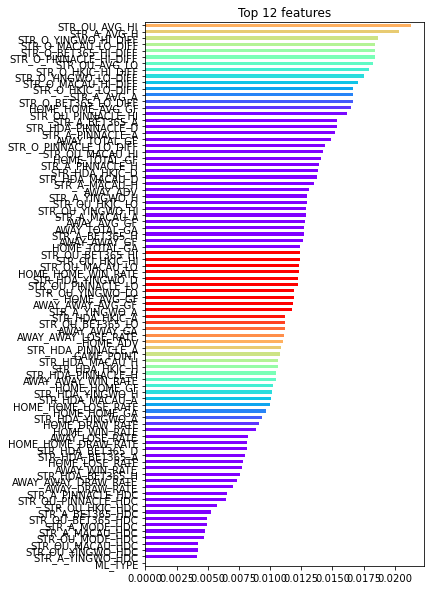

In [19]:
# Get feature importances
rf = model2.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

n = 12
plt.figure(figsize=(5,10))
plt.title(f'Top {n} features')
importances.sort_values().plot.barh(color = iter(cm.rainbow(np.linspace(-1.1,1.5))));

In [20]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(max_iter=300, random_state=42)
)

model3.fit(X_train, y_train)

print('1st LogisticRegression - Training Accuracy:', model3.score(X_train, y_train))
print('1st LogisticRegression - Validation Accuracy:', model3.score(X_val, y_val))
print('1st LogisticRegression - Test Accuracy:', model3.score(X_test, y_test))


1st LogisticRegression - Training Accuracy: 0.662125340599455
1st LogisticRegression - Validation Accuracy: 0.5982905982905983
1st LogisticRegression - Test Accuracy: 0.5974025974025974


C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#remove negative features
# # using
# X_train = X_train[['STR_A_AVG_A','STR_HDA_YINGWO_D','AWAY_AVG_GF','STR_A_MACAU_H','STR_A_AVG_H','GAME_POINT','STR_A_YINGWO_A','STR_O_YINGWO_HI_DIFF','STR_HDA_MACAU_H','STR_OU_BET365_HDC','STR_HDA_MACAU_D','STR_OU_PINNACLE_HDC','AWAY_AWAY_GA','AWAY_AWAY_GF','AWAY_WIN_RATE','AWAY_LOSE_RATE','AWAY_TOTAL_GA','STR_A_PINNACLE_A','STR_OU_YINGWO_HI','STR_HDA_PINNACLE_H','AWAY_AWAY_DRAW_RATE','STR_HDA_HKJC_H','STR_A_MACAU_A','HOME_DRAW_RATE','STR_O_YINGWO_LO_DIFF','STR_A_YINGWO_H','STR_HDA_HKJC_D','AWAY_DRAW_RATE','STR_A_MACAU_HDC','STR_O_MACAU_LO_DIFF','HOME_AVG_GF','STR_HDA_BET365_H','STR_HDA_MACAU_A','STR_OU_AVG_HI','STR_OU_AVG_LO','STR_A_BET365_A','STR_OU_HKJC_HDC','STR_HDA_BET365_A','STR_O_HKJC_LO_DIFF','STR_O_HKJC_HI_DIFF','STR_OU_PINNACLE_LO','AWAY_AWAY_LOSE_RATE','HOME_HOME_DRAW_RATE','HOME_HOME_GF','STR_OU_MODE_HDC','STR_A_PINNACLE_HDC','HOME_ADV','AWAY_TOTAL_GF','AWAY_ADV','STR_A_MODE_HDC','STR_HDA_HKJC_A','STR_O_BET365_LO_DIFF','STR_OU_HKJC_LO','STR_OU_HKJC_HI','STR_OU_MACAU_HDC','STR_A_YINGWO_HDC','STR_A_PINNACLE_H','STR_OU_PINNACLE_HI','AWAY_AWAY_WIN_RATE','STR_O_PINNACLE_HI_DIFF']]
# X_val = X_val[['STR_A_AVG_A','STR_HDA_YINGWO_D','AWAY_AVG_GF','STR_A_MACAU_H','STR_A_AVG_H','GAME_POINT','STR_A_YINGWO_A','STR_O_YINGWO_HI_DIFF','STR_HDA_MACAU_H','STR_OU_BET365_HDC','STR_HDA_MACAU_D','STR_OU_PINNACLE_HDC','AWAY_AWAY_GA','AWAY_AWAY_GF','AWAY_WIN_RATE','AWAY_LOSE_RATE','AWAY_TOTAL_GA','STR_A_PINNACLE_A','STR_OU_YINGWO_HI','STR_HDA_PINNACLE_H','AWAY_AWAY_DRAW_RATE','STR_HDA_HKJC_H','STR_A_MACAU_A','HOME_DRAW_RATE','STR_O_YINGWO_LO_DIFF','STR_A_YINGWO_H','STR_HDA_HKJC_D','AWAY_DRAW_RATE','STR_A_MACAU_HDC','STR_O_MACAU_LO_DIFF','HOME_AVG_GF','STR_HDA_BET365_H','STR_HDA_MACAU_A','STR_OU_AVG_HI','STR_OU_AVG_LO','STR_A_BET365_A','STR_OU_HKJC_HDC','STR_HDA_BET365_A','STR_O_HKJC_LO_DIFF','STR_O_HKJC_HI_DIFF','STR_OU_PINNACLE_LO','AWAY_AWAY_LOSE_RATE','HOME_HOME_DRAW_RATE','HOME_HOME_GF','STR_OU_MODE_HDC','STR_A_PINNACLE_HDC','HOME_ADV','AWAY_TOTAL_GF','AWAY_ADV','STR_A_MODE_HDC','STR_HDA_HKJC_A','STR_O_BET365_LO_DIFF','STR_OU_HKJC_LO','STR_OU_HKJC_HI','STR_OU_MACAU_HDC','STR_A_YINGWO_HDC','STR_A_PINNACLE_H','STR_OU_PINNACLE_HI','AWAY_AWAY_WIN_RATE','STR_O_PINNACLE_HI_DIFF']]
# X_test = X_test[['STR_A_AVG_A','STR_HDA_YINGWO_D','AWAY_AVG_GF','STR_A_MACAU_H','STR_A_AVG_H','GAME_POINT','STR_A_YINGWO_A','STR_O_YINGWO_HI_DIFF','STR_HDA_MACAU_H','STR_OU_BET365_HDC','STR_HDA_MACAU_D','STR_OU_PINNACLE_HDC','AWAY_AWAY_GA','AWAY_AWAY_GF','AWAY_WIN_RATE','AWAY_LOSE_RATE','AWAY_TOTAL_GA','STR_A_PINNACLE_A','STR_OU_YINGWO_HI','STR_HDA_PINNACLE_H','AWAY_AWAY_DRAW_RATE','STR_HDA_HKJC_H','STR_A_MACAU_A','HOME_DRAW_RATE','STR_O_YINGWO_LO_DIFF','STR_A_YINGWO_H','STR_HDA_HKJC_D','AWAY_DRAW_RATE','STR_A_MACAU_HDC','STR_O_MACAU_LO_DIFF','HOME_AVG_GF','STR_HDA_BET365_H','STR_HDA_MACAU_A','STR_OU_AVG_HI','STR_OU_AVG_LO','STR_A_BET365_A','STR_OU_HKJC_HDC','STR_HDA_BET365_A','STR_O_HKJC_LO_DIFF','STR_O_HKJC_HI_DIFF','STR_OU_PINNACLE_LO','AWAY_AWAY_LOSE_RATE','HOME_HOME_DRAW_RATE','HOME_HOME_GF','STR_OU_MODE_HDC','STR_A_PINNACLE_HDC','HOME_ADV','AWAY_TOTAL_GF','AWAY_ADV','STR_A_MODE_HDC','STR_HDA_HKJC_A','STR_O_BET365_LO_DIFF','STR_OU_HKJC_LO','STR_OU_HKJC_HI','STR_OU_MACAU_HDC','STR_A_YINGWO_HDC','STR_A_PINNACLE_H','STR_OU_PINNACLE_HI','AWAY_AWAY_WIN_RATE','STR_O_PINNACLE_HI_DIFF']]

X_train = X_train[['HOME_HOME_GF','STR_HDA_BET365_D','STR_HDA_MACAU_H','HOME_DRAW_RATE','HOME_ADV','STR_HDA_BET365_H','STR_O_PINNACLE_HI_DIFF','STR_A_BET365_A','STR_O_HKJC_HI_DIFF','STR_OU_YINGWO_LO','STR_O_HKJC_LO_DIFF','STR_HDA_PINNACLE_D','HOME_WIN_RATE','AWAY_TOTAL_GF','AWAY_TOTAL_GA','STR_A_YINGWO_HDC','STR_OU_HKJC_HDC','STR_A_MACAU_A','AWAY_AWAY_WIN_RATE','STR_HDA_YINGWO_A','STR_OU_YINGWO_HDC','STR_OU_BET365_LO','AWAY_AWAY_AVG_GF','STR_O_BET365_LO_DIFF','STR_HDA_HKJC_A','AWAY_AVG_GF','STR_OU_YINGWO_HI','STR_O_BET365_HI_DIFF','STR_OU_PINNACLE_HI','AWAY_DRAW_RATE','STR_A_YINGWO_H','STR_OU_MACAU_LO','AWAY_AWAY_GA','AWAY_WIN_RATE','STR_OU_MACAU_HI','HOME_TOTAL_GA','STR_OU_MACAU_HDC']]
X_val = X_val[['HOME_HOME_GF','STR_HDA_BET365_D','STR_HDA_MACAU_H','HOME_DRAW_RATE','HOME_ADV','STR_HDA_BET365_H','STR_O_PINNACLE_HI_DIFF','STR_A_BET365_A','STR_O_HKJC_HI_DIFF','STR_OU_YINGWO_LO','STR_O_HKJC_LO_DIFF','STR_HDA_PINNACLE_D','HOME_WIN_RATE','AWAY_TOTAL_GF','AWAY_TOTAL_GA','STR_A_YINGWO_HDC','STR_OU_HKJC_HDC','STR_A_MACAU_A','AWAY_AWAY_WIN_RATE','STR_HDA_YINGWO_A','STR_OU_YINGWO_HDC','STR_OU_BET365_LO','AWAY_AWAY_AVG_GF','STR_O_BET365_LO_DIFF','STR_HDA_HKJC_A','AWAY_AVG_GF','STR_OU_YINGWO_HI','STR_O_BET365_HI_DIFF','STR_OU_PINNACLE_HI','AWAY_DRAW_RATE','STR_A_YINGWO_H','STR_OU_MACAU_LO','AWAY_AWAY_GA','AWAY_WIN_RATE','STR_OU_MACAU_HI','HOME_TOTAL_GA','STR_OU_MACAU_HDC']]
X_test = X_test[['HOME_HOME_GF','STR_HDA_BET365_D','STR_HDA_MACAU_H','HOME_DRAW_RATE','HOME_ADV','STR_HDA_BET365_H','STR_O_PINNACLE_HI_DIFF','STR_A_BET365_A','STR_O_HKJC_HI_DIFF','STR_OU_YINGWO_LO','STR_O_HKJC_LO_DIFF','STR_HDA_PINNACLE_D','HOME_WIN_RATE','AWAY_TOTAL_GF','AWAY_TOTAL_GA','STR_A_YINGWO_HDC','STR_OU_HKJC_HDC','STR_A_MACAU_A','AWAY_AWAY_WIN_RATE','STR_HDA_YINGWO_A','STR_OU_YINGWO_HDC','STR_OU_BET365_LO','AWAY_AWAY_AVG_GF','STR_O_BET365_LO_DIFF','STR_HDA_HKJC_A','AWAY_AVG_GF','STR_OU_YINGWO_HI','STR_O_BET365_HI_DIFF','STR_OU_PINNACLE_HI','AWAY_DRAW_RATE','STR_A_YINGWO_H','STR_OU_MACAU_LO','AWAY_AWAY_GA','AWAY_WIN_RATE','STR_OU_MACAU_HI','HOME_TOTAL_GA','STR_OU_MACAU_HDC']]

In [22]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=12, random_state=42, n_jobs=-1, learning_rate=0.097, subsample=1)
)

model1.fit(X_train, y_train)

print('2nd XGBClassifier - Training Accuracy:', model1.score(X_train, y_train))
print('2nd XGBClassifier - Validation Accuracy:', model1.score(X_val, y_val))
print('2nd XGBClassifier - Test Accuracy:', model1.score(X_test, y_test))


2nd XGBClassifier - Training Accuracy: 0.8474114441416893
2nd XGBClassifier - Validation Accuracy: 0.6068376068376068
2nd XGBClassifier - Test Accuracy: 0.5627705627705628


In [23]:
model2 = Pipeline([
                  ('oe', ce.OrdinalEncoder()),
                  ('impute', SimpleImputer(strategy='mean')),
                  ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

model2.fit(X_train, y_train)

print('2nd RandomForestClassifier - Training accuracy:', model2.score(X_train, y_train))
print('2nd RandomForestClassifier - Validation accuracy:', model2.score(X_val, y_val))
print('2nd RandomForestClassifier - Test accuracy:', model2.score(X_test, y_test))

2nd RandomForestClassifier - Training accuracy: 1.0
2nd RandomForestClassifier - Validation accuracy: 0.5598290598290598
2nd RandomForestClassifier - Test accuracy: 0.6103896103896104


In [24]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [25]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='accuracy')

In [26]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)

Weight,Feature
0.0094 ± 0.0198,STR_O_HKJC_LO_DIFF
0.0060 ± 0.0227,STR_OU_HKJC_HDC
0.0051 ± 0.0166,STR_O_BET365_LO_DIFF
0.0051 ± 0.0261,STR_HDA_HKJC_A
0.0043 ± 0.0259,STR_O_HKJC_HI_DIFF
0.0043 ± 0.0076,STR_OU_YINGWO_HDC
0.0043 ± 0.0094,STR_OU_PINNACLE_HI
0.0026 ± 0.0159,AWAY_AVG_GF
0.0026 ± 0.0116,AWAY_WIN_RATE
0.0017 ± 0.0128,STR_A_YINGWO_H


In [27]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(random_state=42)
)

model3.fit(X_train, y_train)

print('2nd LogisticRegression - Training Accuracy:', model3.score(X_train, y_train))
print('2nd LogisticRegression - Validation Accuracy:', model3.score(X_val, y_val))
print('2nd LogisticRegression - Test Accuracy:', model3.score(X_test, y_test))


2nd LogisticRegression - Training Accuracy: 0.6430517711171662
2nd LogisticRegression - Validation Accuracy: 0.5854700854700855
2nd LogisticRegression - Test Accuracy: 0.5974025974025974


C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
import matplotlib.pyplot as plt


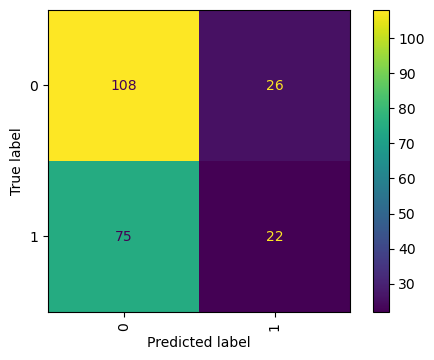

In [29]:
#Confusion graph
from sklearn.metrics import plot_confusion_matrix, classification_report

plt.rcParams['figure.dpi'] = 100
plot_confusion_matrix(model1, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [30]:
# df1.tail()

In [31]:
test = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL', 'STR_OU_MACAU_HDC', 'STR_OU_MACAU_HI', 'STR_OU_MACAU_LO', 'STR_OU_HKJC_HDC', 'STR_OU_HKJC_HI', 'STR_OU_HKJC_LO', 'TOTAL_GOAL_COUNT', ou_hdc]]

test = test.query('ML_TYPE == "TEST" | ML_TYPE == "PREDICT"')

In [32]:
y_pred = model1.predict(X_test)
class_probabilities = model1.predict_proba(X_test)

pred = pd.DataFrame(y_pred, columns=['pred'])
prob = pd.DataFrame(class_probabilities, columns=['prob0','prob1' ])

test.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)
prob.reset_index(drop=True, inplace=True)

test_result = pd.concat([test, prob, pred], axis=1)


In [33]:
# for i,j in fin.iterrows():
#     if fin.loc[i, 'prob0'] >= 0.6:
#         print(fin.loc[[i]])
#         print('%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s' % (fin.loc[i, 'MATCH_DATETIME'],fin.loc[i, 'HOME_TEAM'],fin.loc[i, 'AWAY_TEAM'],fin.loc[i, 'HOME_FT_GOAL'],fin.loc[i, 'AWAY_FT_GOAL'],fin.loc[i, 'STR_HKJC_HILO_HANDICAP'],fin.loc[i, 'STR_HKJC_HILO_HI'],fin.loc[i, 'STR_HKJC_HILO_LO'],fin.loc[i, 'TOTAL_GOAL_COUNT'],fin.loc[i, 'OU25'],fin.loc[i, 'prob0'],fin.loc[i, 'prob1'],fin.loc[i, 'pred']))

In [34]:
#def a(fin):
#    if (fin['prob0'] >= 0.55 or fin['prob1'] >= 0.55):
#        return 1
#    else:
#      return 0
#fin = fin.assign(O55=fin.apply(a, axis=1))

In [35]:
bet_amount = 500

home_goal_col = 'HOME_FT_GOAL'
away_goal_col = 'AWAY_FT_GOAL'

macau_hdc_col = 'STR_OU_MACAU_HDC'
macau_hi_col = 'STR_OU_MACAU_HI'
macau_lo_col = 'STR_OU_MACAU_LO'

hkjc_hdc_col = 'STR_OU_HKJC_HDC'
hkjc_hi_col = 'STR_OU_HKJC_HI'
hkjc_lo_col = 'STR_OU_HKJC_LO'

In [36]:
# test_result['Correct'] = (test_result[ou_hdc] == test_result['pred']).astype(int)
import math

for i,j in test_result.iterrows():
    if test_result.loc[i, home_goal_col]+test_result.loc[i, away_goal_col] > test_result.loc[i, macau_hdc_col]:
        test_result.loc[i, 'Correct_MS'] = str('1')
    elif test_result.loc[i, home_goal_col]+test_result.loc[i, away_goal_col] == test_result.loc[i, macau_hdc_col]:
        test_result.loc[i, 'Correct_MS'] = str('-')
    elif math.isnan(test_result.loc[i, home_goal_col]):
        test_result.loc[i, home_goal_col] = None
        test_result.loc[i, away_goal_col] = None
        test_result.loc[i, ou_hdc] = None
        test_result.loc[i, 'Correct_MS'] = str('NaN')
    else:
        test_result.loc[i, 'Correct_MS'] = str('0')
        
    if test_result.loc[i, home_goal_col]+test_result.loc[i, away_goal_col] > test_result.loc[i, hkjc_hdc_col]:
        test_result.loc[i, 'Correct_JC'] = str('1')
    elif test_result.loc[i, home_goal_col]+test_result.loc[i, away_goal_col] == test_result.loc[i, hkjc_hdc_col]:
        test_result.loc[i, 'Correct_JC'] = str('-')
    elif math.isnan(test_result.loc[i, home_goal_col]):
        test_result.loc[i, home_goal_col] = None
        test_result.loc[i, away_goal_col] = None
        test_result.loc[i, ou_hdc] = None
        test_result.loc[i, 'Correct_JC'] = str('NaN')
    else:
        test_result.loc[i, 'Correct_JC'] = str('0')
        
# test_result

In [37]:
#betting on every single match
macau_money = []
macau_count = 0
hkjc_money = []
hkjc_count = 0

for i,j in test_result.iterrows():
    if test_result.loc[i, 'prob1'] >= 0.62:
        # Macau
        if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*test_result.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*test_result.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
        
#   if test_result.loc[i, 'Correct'] == 1:
#       if test_result.loc[i, ou_hdc] == 1:
#         count = (count + (100*test_result.loc[i, hi_col]))
#         money.append(count)
#       elif test_result.loc[i, ou_hdc] == 0:
#         count = (count + (100*test_result.loc[i, lo_col]))
#         money.append(count)
#   else:
#     count = count - 100
#     money.append(count)
    
test_result.loc[:, 'Model1_MS'] = pd.Series(macau_money)
test_result.loc[:, 'Model1_JC'] = pd.Series(hkjc_money)

In [38]:
#betting on every over (baseline)
macau_money = []
macau_count = 0
hkjc_money = []
hkjc_count = 0

for i,j in test_result.iterrows():
    if test_result.loc[i, 'prob1'] >= 0.5:
        # Macau
        if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*test_result.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*test_result.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
        
#     if test_result.loc[i, ou_hdc] == 1:
#         count = (count + (100*test_result.loc[i, hi_col]))
#         money.append(count)
#     else:
#       count = count - 100
#       money.append(count)
    
test_result.loc[:, 'Baseline_MS'] = pd.Series(macau_money)
test_result.loc[:, 'Baseline_JC'] = pd.Series(hkjc_money)

In [39]:
test_result[ou_hdc].value_counts(normalize=True)

0.0    0.578261
1.0    0.421739
Name: OU35, dtype: float64

In [40]:
# fin

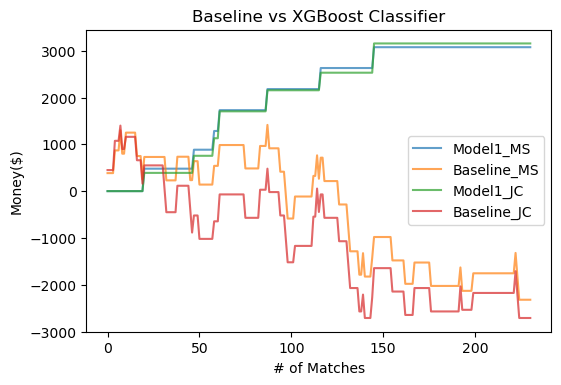

In [41]:
test_result.plot(y=["Model1_MS", "Baseline_MS", "Model1_JC", "Baseline_JC"], alpha=0.7)
plt.title('Baseline vs XGBoost Classifier')
plt.xlabel('# of Matches')
plt.ylabel('Money($)')

plt.show()

In [42]:
test_result = test_result.drop(["Model1_MS", "Baseline_MS", "Model1_JC", "Baseline_JC"], axis=1)


In [43]:
#betting on only 52% Confidence 
macau_money = []
macau_count = 0 
hkjc_money = []
hkjc_count = 0 
prob = 0.52

for i,j in test_result.iterrows():
    if test_result.loc[i, 'prob1'] >= prob:
        # Macau
        if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*test_result.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*test_result.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
    
test_result.loc[:, 'MS_PL_0.52'] = pd.Series(macau_money)
test_result.loc[:, 'JC_PL_0.52'] = pd.Series(hkjc_money)

In [44]:
#betting on only 55% Confidence 
macau_money = []
macau_count = 0 
hkjc_money = []
hkjc_count = 0 
prob = 0.55

for i,j in test_result.iterrows():
    if test_result.loc[i, 'prob1'] >= prob:
        # Macau
        if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*test_result.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*test_result.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
    
test_result.loc[:, 'MS_PL_0.55'] = pd.Series(macau_money)
test_result.loc[:, 'JC_PL_0.55'] = pd.Series(hkjc_money)

In [45]:
#betting on only 60% Confidence 
macau_money = []
macau_count = 0 
hkjc_money = []
hkjc_count = 0 
prob = 0.6

for i,j in test_result.iterrows():
    if test_result.loc[i, 'prob1'] >= prob:
        # Macau
        if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*test_result.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*test_result.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
    
test_result.loc[:, 'MS_PL_0.60'] = pd.Series(macau_money)
test_result.loc[:, 'JC_PL_0.60'] = pd.Series(hkjc_money)

In [46]:
# #betting on only 62% Confidence 
# macau_money = []
# macau_count = 0 
# hkjc_money = []
# hkjc_count = 0 
# prob = 0.62

# for i,j in test_result.iterrows():
#     if test_result.loc[i, 'prob1'] >= prob:
#         # Macau
#         if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, macau_hdc_col]:
#             macau_count = (macau_count + (bet_amount*test_result.loc[i, macau_hi_col]))
#             macau_money.append(macau_count)
#         elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, macau_hdc_col]:
#             macau_money.append(macau_count)
#         else:
#             macau_count = macau_count - bet_amount
#             macau_money.append(macau_count)
            
#         # HKJC
#         if test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] > test_result.loc[i, hkjc_hdc_col]:
#             hkjc_count = (hkjc_count + (bet_amount*test_result.loc[i, hkjc_hi_col]))
#             hkjc_money.append(hkjc_count)
#         elif test_result.loc[i, home_goal_col] + test_result.loc[i, away_goal_col] == test_result.loc[i, hkjc_hdc_col]:
#             hkjc_money.append(hkjc_count)
#         else:
#             hkjc_count = hkjc_count - bet_amount
#             hkjc_money.append(hkjc_count)
#     else:
#         macau_money.append(macau_count)
#         hkjc_money.append(hkjc_count)
    
# test_result.loc[:, 'MS_PL_0.62'] = pd.Series(macau_money)
# test_result.loc[:, 'JC_PL_0.62'] = pd.Series(hkjc_money)

In [47]:
# hi_prob = 0.62
# print('MATCH_DATETIME > \'%s\'' % current_match_date)
# finq = fin.query('MATCH_DATETIME > \'%s\' & prob1>=%s' % (current_match_date, hi_prob))
# finq = fin.query('prob1>=%s' % (hi_prob))
# finq

# finq.tail(20)
# fin.tail(50)
# fin.head(50)
# finq = finq.drop(['HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT','OU25','prob0','Correct','PL 0.55','PL 0.6','PL 0.65','PL 0.7'], axis=1)
# finq

# test_result = test_result[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL', 'STR_OU_MACAU_HDC', 'STR_OU_MACAU_HI', 'STR_OU_MACAU_LO', 'STR_OU_HKJC_HDC', 'STR_OU_HKJC_HI', 'STR_OU_HKJC_LO', 'TOTAL_GOAL_COUNT', ou_hdc, 'prob1']]
test_result

,MATCH_ID,MATCH_DATETIME,ML_TYPE,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,TOTAL_GOAL_COUNT,OU35,prob0,prob1,pred,Correct_MS,Correct_JC,MS_PL_0.52,JC_PL_0.52,MS_PL_0.55,JC_PL_0.55,MS_PL_0.60,JC_PL_0.60
0,1884677,2020-09-01 02:00:00,TEST,荷乙,迪加史卓普,丹博斯治,4.0,2.0,3.25,0.77,0.83,3.5,0.90,0.80,6.0,1.0,0.468546,0.531454,1,1,1,385.0,450.0,0.0,0.0,0.0,0.0
1,1908521,2020-09-02 18:00:00,TEST,日聯盃,札幌岡薩多,橫濱水手,1.0,1.0,3.75,0.82,0.88,3.5,0.70,1.02,2.0,0.0,0.648883,0.351117,0,0,0,385.0,450.0,0.0,0.0,0.0,0.0
2,1896858,2020-09-03 08:00:00,TEST,美職業,侯斯頓戴拿模,明尼蘇達聯,3.0,0.0,3.00,0.91,0.79,2.5,0.55,1.29,3.0,0.0,0.560753,0.439247,0,-,1,385.0,450.0,0.0,0.0,0.0,0.0
3,1896860,2020-09-03 08:30:00,TEST,美職業,肯薩斯體育會,FC達拉斯,1.0,1.0,3.00,0.94,0.76,2.5,0.62,1.15,2.0,0.0,0.566478,0.433522,0,0,0,385.0,450.0,0.0,0.0,0.0,0.0
4,1896864,2020-09-03 10:30:00,TEST,美職業,波特蘭伐木者,洛杉磯銀河,2.0,3.0,3.25,0.97,0.73,3.5,1.25,0.57,5.0,1.0,0.435328,0.564672,1,1,1,870.0,1075.0,485.0,625.0,0.0,0.0
5,1896863,2020-09-03 11:00:00,TEST,美職業,洛杉磯FC,聖荷西地震,5.0,1.0,3.25,0.75,0.95,3.5,0.80,0.90,6.0,1.0,0.508206,0.491794,0,1,1,870.0,1075.0,485.0,625.0,0.0,0.0
6,1872436,2020-09-05 17:00:00,TEST,日職聯,清水心跳,柏雷素爾,1.0,2.0,3.25,0.90,0.90,3.5,1.05,0.68,3.0,0.0,0.595989,0.404011,0,0,0,870.0,1075.0,485.0,625.0,0.0,0.0
7,1872441,2020-09-05 17:00:00,TEST,日職聯,橫濱水手,川崎前鋒,1.0,3.0,3.75,0.86,0.94,3.5,0.65,1.10,4.0,1.0,0.462634,0.537366,1,1,1,1300.0,1400.0,485.0,625.0,0.0,0.0
8,1908073,2020-09-05 22:00:00,TEST,英聯盃,彼德堡,車頓咸,0.0,1.0,3.00,0.88,0.82,2.5,0.60,1.19,1.0,0.0,0.496322,0.503678,1,0,0,1300.0,1400.0,485.0,625.0,0.0,0.0
9,1917017,2020-09-05 22:00:00,TEST,英聯盃,哈德斯菲爾德,羅奇代爾,0.0,1.0,2.75,0.95,0.75,2.5,0.62,1.15,1.0,0.0,0.673525,0.326475,0,0,0,1300.0,1400.0,485.0,625.0,0.0,0.0


In [48]:
# col_ml_type = '35'

# # Remove previous record
# sql = 'DELETE FROM OU_PREDICT WHERE ML_TYPE=:col_ml_type AND MATCH_DATE=:db_match_date'
# c.execute(sql, [col_ml_type,db_match_date])

# data_to_insert = []
# # Insert db
# for i,j in finq.iterrows():
#     col_match_id = int(fin.loc[i, 'MATCH_ID'])
#     col_match_datetime = str(fin.loc[i, 'MATCH_DATETIME'])
#     col_league = str(fin.loc[i, 'LEAGUE'])
#     col_home_team = str(fin.loc[i, 'HOME_TEAM'])
#     col_away_team = str(fin.loc[i, 'AWAY_TEAM'])
#     col_str_ou_macau_hdc = float(fin.loc[i, 'STR_OU_MACAU_HDC'])
#     col_str_ou_macau_hi = float(fin.loc[i, 'STR_OU_MACAU_HI'])
#     col_str_ou_macau_lo = float(fin.loc[i, 'STR_OU_MACAU_LO'])
#     col_str_ou_hkjc_hdc = float(fin.loc[i, 'STR_OU_HKJC_HDC'])
#     col_str_ou_hkjc_hi = float(fin.loc[i, 'STR_OU_HKJC_HI'])
#     col_str_ou_hkjc_lo = float(fin.loc[i, 'STR_OU_HKJC_LO'])
#     col_prob1 = float(fin.loc[i, 'prob1'])
#     data_to_insert.append([col_ml_type,col_match_id,col_match_datetime,col_league,col_home_team,col_away_team,col_str_ou_macau_hdc,col_str_ou_macau_hi,col_str_ou_macau_lo,col_str_ou_hkjc_hdc,col_str_ou_hkjc_hi,col_str_ou_hkjc_lo,col_prob1,db_match_date])

# sql = 'INSERT INTO OU_PREDICT (ML_TYPE,MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,HI_PROB,MATCH_DATE) VALUES (:col_ml_type,:col_match_id,TO_DATE(:col_match_datetime,\'YYYY-MM-DD HH24:MI:SS\'),:col_league,:col_home_team,:col_away_team,:col_str_ou_macau_hdc,:col_str_ou_macau_hi,:col_str_ou_macau_lo,:col_str_ou_hkjc_hdc,:col_str_ou_hkjc_hi,:col_str_ou_hkjc_lo,:col_prob1,:db_match_date)'
# c.executemany(sql, data_to_insert)
# connection.commit()

In [49]:
predict = test_result.query('ML_TYPE == "PREDICT"')
predict

,MATCH_ID,MATCH_DATETIME,ML_TYPE,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,TOTAL_GOAL_COUNT,OU35,prob0,prob1,pred,Correct_MS,Correct_JC,MS_PL_0.52,JC_PL_0.52,MS_PL_0.55,JC_PL_0.55,MS_PL_0.60,JC_PL_0.60
230,1884746,2020-10-10 03:00:00,PREDICT,荷乙,FC燕豪芬,SBV精英隊,NaN,NaN,3.25,0.77,0.83,3.5,0.78,0.92,NaN,NaN,0.553438,0.446562,0,NaN,NaN,385.0,565.0,-155.0,90.0,3485.0,3605.0


In [50]:
# col_ml_type = '35'

# # Remove previous record
# sql = 'DELETE FROM OU_PREDICT WHERE ML_TYPE=:col_ml_type AND MATCH_DATE=:db_match_date'
# c.execute(sql, [col_ml_type,db_match_date])

# data_to_insert = []
# # Insert db
# for i,j in finq.iterrows():
#     col_match_id = int(fin.loc[i, 'MATCH_ID'])
#     col_match_datetime = str(fin.loc[i, 'MATCH_DATETIME'])
#     col_league = str(fin.loc[i, 'LEAGUE'])
#     col_home_team = str(fin.loc[i, 'HOME_TEAM'])
#     col_away_team = str(fin.loc[i, 'AWAY_TEAM'])
#     col_str_ou_macau_hdc = float(fin.loc[i, 'STR_OU_MACAU_HDC'])
#     col_str_ou_macau_hi = float(fin.loc[i, 'STR_OU_MACAU_HI'])
#     col_str_ou_macau_lo = float(fin.loc[i, 'STR_OU_MACAU_LO'])
#     col_str_ou_hkjc_hdc = float(fin.loc[i, 'STR_OU_HKJC_HDC'])
#     col_str_ou_hkjc_hi = float(fin.loc[i, 'STR_OU_HKJC_HI'])
#     col_str_ou_hkjc_lo = float(fin.loc[i, 'STR_OU_HKJC_LO'])
#     col_prob1 = float(fin.loc[i, 'prob1'])
#     data_to_insert.append([col_ml_type,col_match_id,col_match_datetime,col_league,col_home_team,col_away_team,col_str_ou_macau_hdc,col_str_ou_macau_hi,col_str_ou_macau_lo,col_str_ou_hkjc_hdc,col_str_ou_hkjc_hi,col_str_ou_hkjc_lo,col_prob1,db_match_date])

# sql = 'INSERT INTO OU_PREDICT (ML_TYPE,MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,HI_PROB,MATCH_DATE) VALUES (:col_ml_type,:col_match_id,TO_DATE(:col_match_datetime,\'YYYY-MM-DD HH24:MI:SS\'),:col_league,:col_home_team,:col_away_team,:col_str_ou_macau_hdc,:col_str_ou_macau_hi,:col_str_ou_macau_lo,:col_str_ou_hkjc_hdc,:col_str_ou_hkjc_hi,:col_str_ou_hkjc_lo,:col_prob1,:db_match_date)'
# c.executemany(sql, data_to_insert)
# connection.commit()

In [51]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

param_distributions = {
    'randomforestclassifier__n_estimators':[20,50,100,200],
    'randomforestclassifier__criterion':['gini', 'entropy'],
    'randomforestclassifier__max_features':[0.25,3,5],
    'randomforestclassifier__min_samples_split':[3,5,15],
    'randomforestclassifier__min_samples_leaf':[2,5],
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.8s finished


In [52]:
print('Cross-validation Best Score:', search.best_score_)
print('Best Estimator:', search.best_params_)
print('Best Model:', search.best_estimator_)

Cross-validation Best Score: 0.6167009461127109
Best Estimator: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_features': 5, 'randomforestclassifier__criterion': 'gini'}
Best Model: Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=5, min_samples_leaf=5,
                                        min_samples_split=5, n_jobs=-1,
                                        random_state=42))])
